<a href="https://colab.research.google.com/github/AftabUdaipurwala/Deeplearning/blob/main/Data_Augumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import cv2
import pandas as pd
import numpy as np
from sklearn import linear_model
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import PIL
import tensorflow_datasets as tfds

In [45]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
!ls '/content/drive/MyDrive/py-master/DeepLearningML/17_data_augmentation/'

cnn_flower_image_classification_data_augmentations.ipynb  daisy2.JPG


In [47]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   cache_dir ='.',
                                   untar=True)

In [48]:
data_dir

'./datasets/flower_photos'

In [49]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [50]:
image_count = len(list(data_dir.glob('*/*.jpg'))) # lenght of my dataset
image_count

3670

In [51]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5061135742_2870a7b691_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/18389368680_91c24a2087_z.jpg'),
 PosixPath('datasets/flower_photos/roses/6936225976_a91b60d8c2_m.jpg')]

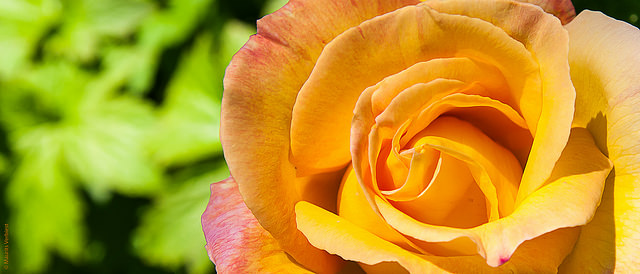

In [52]:
PIL.Image.open(str(roses[3]))

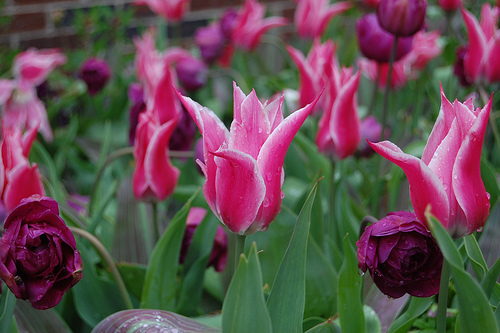

In [53]:
tulips = list(data_dir.glob('tulips/*.jpg'))
tulips[:5]
PIL.Image.open(str(tulips[3]))

In [54]:
flowers_image_dict ={
    'roses':list(data_dir.glob('roses/*.jpg')),
    'tulips':list(data_dir.glob('tulips/*.jpg')),
    'dandelion':list(data_dir.glob('dandelion/*.jpg')),
    'daisy':list(data_dir.glob('daisy/*.jpg')),
    'sunflowers':list(data_dir.glob('sunflowers/*.jpg'))
}

In [55]:
flowers_image_dict['daisy']

[PosixPath('datasets/flower_photos/daisy/14114116486_0bb6649bc1_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/517054463_036db655a1_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/9321854387_5f77c926cb_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3758221664_b19116d61f.jpg'),
 PosixPath('datasets/flower_photos/daisy/9286947622_4822f4fc21.jpg'),
 PosixPath('datasets/flower_photos/daisy/517054467_d82d323c33_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/2889325612_f2fc403ff0_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/20619292635_9857a12d54.jpg'),
 PosixPath('datasets/flower_photos/daisy/4482623536_b9fb5ae41f_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/4434592930_6610d51fca_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/14816364517_2423021484_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/2365428551_39f83f10bf_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/14221848160_7f0a37c395.jpg'),
 PosixPath('datasets/flower_photos/daisy/14372713423_61e2daae88.jpg'),

In [56]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [57]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))
img

array([[[255, 254, 254],
        [248, 253, 252],
        [244, 250, 249],
        ...,
        [255, 249, 254],
        [255, 248, 254],
        [255, 248, 254]],

       [[127, 174, 225],
        [134, 191, 236],
        [127, 179, 219],
        ...,
        [152, 197, 234],
        [144, 198, 233],
        [144, 198, 233]],

       [[174, 202, 232],
        [163, 200, 228],
        [167, 204, 232],
        ...,
        [170, 207, 235],
        [173, 207, 237],
        [173, 207, 237]],

       ...,

       [[252, 245, 252],
        [253, 246, 253],
        [253, 246, 253],
        ...,
        [253, 249, 255],
        [249, 245, 251],
        [249, 245, 251]],

       [[254, 247, 254],
        [254, 247, 254],
        [253, 246, 253],
        ...,
        [251, 243, 253],
        [252, 248, 254],
        [252, 248, 254]],

       [[249, 246, 255],
        [248, 245, 254],
        [248, 245, 254],
        ...,
        [254, 245, 255],
        [250, 243, 255],
        [250, 243, 255]]

In [58]:
img.shape

(240, 178, 3)

In [59]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [60]:
x,y =[],[]

for flower_names, images in flowers_image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_image = cv2.resize(img,(180,180))
    x.append(resized_image)
    y.append(flowers_labels_dict[flower_names])


In [61]:
x = np.array(x)
y= np.array(y)

In [62]:
x.shape

(3670, 180, 180, 3)

In [63]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, random_state=0)
xtrain_scaled = xtrain/255
xtest_scaled = xtest/255
xtrain_scaled

array([[[[0.01568627, 0.19215686, 0.24705882],
         [0.00784314, 0.19215686, 0.24705882],
         [0.01568627, 0.19215686, 0.24705882],
         ...,
         [0.0745098 , 0.17254902, 0.25098039],
         [0.0745098 , 0.17254902, 0.23921569],
         [0.06666667, 0.16862745, 0.23529412]],

        [[0.01568627, 0.19215686, 0.24705882],
         [0.00784314, 0.19215686, 0.24705882],
         [0.00784314, 0.19215686, 0.24313725],
         ...,
         [0.07843137, 0.17647059, 0.25490196],
         [0.0745098 , 0.17254902, 0.23921569],
         [0.06666667, 0.16862745, 0.23529412]],

        [[0.01568627, 0.19215686, 0.24313725],
         [0.00784314, 0.19607843, 0.24313725],
         [0.00392157, 0.19215686, 0.23921569],
         ...,
         [0.07843137, 0.18039216, 0.25098039],
         [0.0745098 , 0.17254902, 0.23921569],
         [0.07058824, 0.17254902, 0.23921569]],

        ...,

        [[0.        , 0.09803922, 0.12156863],
         [0.        , 0.10588235, 0.12156863]

In [65]:
# building model using Convulution neural network layers
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(xtrain_scaled,ytrain,epochs=5)

Epoch 1/5
86/86 [==============================] - 81s 927ms/step - loss: 1.2749 - accuracy: 0.4680
Epoch 2/5
86/86 [==============================] - 80s 928ms/step - loss: 0.9631 - accuracy: 0.6228
Epoch 3/5
86/86 [==============================] - 80s 930ms/step - loss: 0.7573 - accuracy: 0.7057
Epoch 4/5
86/86 [==============================] - 81s 943ms/step - loss: 0.5238 - accuracy: 0.8038
Epoch 5/5
86/86 [==============================] - 83s 963ms/step - loss: 0.3156 - accuracy: 0.8910


In [66]:
model.evaluate(xtest_scaled,ytest) # this shows that model is overfitting hence significant drop from training results to testing results

29/29 [==============================] - 8s 275ms/step - loss: 1.1767 - accuracy: 0.6481


[1.1766717433929443, 0.6481481194496155]

In [75]:
predictions = model.predict(xtest_scaled)
predictions

4

In [77]:
score = tf.nn.softmax(predictions[0])
score = np.argmax(score)
score,ytest[0]

(4, 4)

In [78]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.3)
])

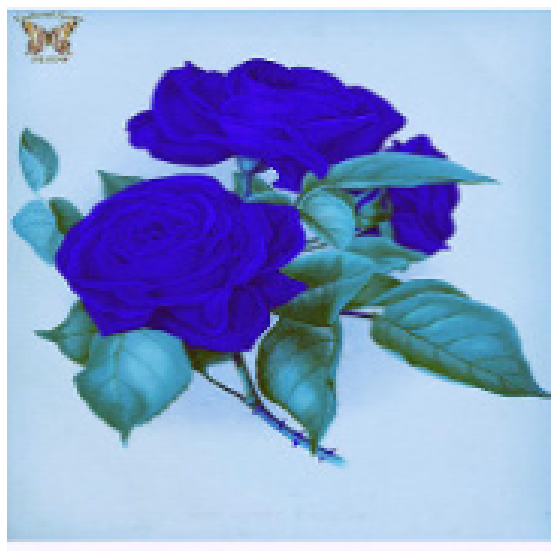

In [79]:
plt.axis('off')
plt.imshow(x[0])


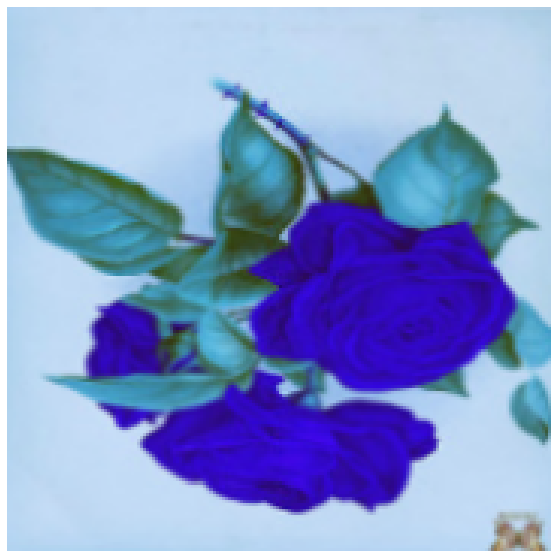

In [81]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8')) # image got flipped

In [83]:
# building model with data augumentation

# building model using Convulution neural network layers
num_classes = 5

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(16, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(xtrain_scaled,ytrain,epochs=100)

Epoch 1/5
86/86 [==============================] - 97s 1s/step - loss: 1.4013 - accuracy: 0.4048
Epoch 2/5
86/86 [==============================] - 94s 1s/step - loss: 1.0927 - accuracy: 0.5567
Epoch 3/5
86/86 [==============================] - 94s 1s/step - loss: 1.0265 - accuracy: 0.5959
Epoch 4/5
86/86 [==============================] - 94s 1s/step - loss: 0.9495 - accuracy: 0.6283
Epoch 5/5
86/86 [==============================] - 95s 1s/step - loss: 0.9196 - accuracy: 0.6450


In [84]:
model.evaluate(xtest_scaled,ytest) # this shows that model has improved because of data augumentation

29/29 [==============================] - 8s 279ms/step - loss: 0.8893 - accuracy: 0.6318


[0.8892760276794434, 0.6318082809448242]